In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import random

N   = 10
aux = frange(0,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

vx  = np.random.choice(aux, N, replace = True)
vy  = np.random.choice(aux, N, replace = True)
vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

vx = vx*400 + 100
vy = vy*400 + 100
vz = vz*400 + 100

In [6]:
W = np.ndarray([N,6])
W[:,0]=x
W[:,1]=y
W[:,2]=z
W[:,3]=vx
W[:,4]=vy
W[:,5]=vz
# print W

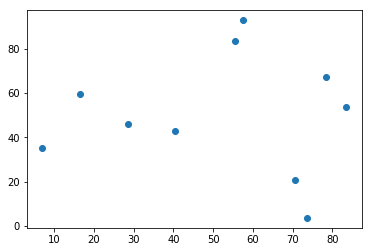

In [7]:
plt.plot(W[:,0],W[:,1],'o')

In [8]:
m = np.ones(len(x))*1e10

In [9]:
from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,N)

R = np.ndarray([N,6])
R[:,0]=vx
R[:,1]=vy
R[:,2]=vz
R[:,3]=ax
R[:,4]=ay
R[:,5]=az

In [ ]:
h = 1
for k in range(0,1000):
    for i in range(0,N):
        
        k1 = R[i,:]
        
        W[i,:] = W[i,:] + (1/2.)*h * R[i,:]
        R[:,0] = W[:,3]
        R[:,1] = W[:,4]
        R[:,2] = W[:,5]
        
        R[:,3], R[:,4], R[:,5] = aceleracion.a_str(m,W[:,0],W[:,1],W[:,2],N)
        
        k2 = R
        
        W[i,:] = W[i,:] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)